## Imports:

In [1]:
import pandas as pnd
import numpy as nmp
import math

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder


## Create dataframe from the dataset's CSV

In [2]:
df = pnd.read_csv("dataset.csv")

df.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,NaN,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,NaN,NaN,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,NaN,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Data Preprocessing

### Pre analysis
The pre anaysis must be done in the first place, so that we can identify outliers.

TODO: Should we fix the age feature (switch the ones where the age is -1 with the mean?)

In [3]:
df.describe()

,Id,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45199.000000,45208.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,23606.000000,40.933627,1362.346620,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.623149,3044.852387,8.322476,257.527812,3.098021,100.128746,2.303441
min,1001.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
df.isna().any()

Id           False
age           True
job           True
marital      False
education    False
default      False
balance       True
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

### Filtering Outliers
By making the previous checks, we know that:
 - The ID column is quite useless for our study, and therefore should be excluded;
 - There are rows where there is no age, job or balance value - these rows should be pruned. This can be done without impacting our dataset too much, since there are only about 15 rows that are dopped after this;
 - Besides the previously pruned, we should also prune two other columns: the "poutcome" column and the "contact" column, since both of them have "unknown" as all their values;

In [5]:
df = df.drop(["Id", "poutcome", "contact"], axis="columns")
df = df.dropna()

In [6]:
df.shape

(45197, 15)

### Encode the target variable

We now need to encode our target variable in order to make it usable in our models.

In [10]:
encoder = LabelEncoder()

df['y'] = encoder.fit_transform(df['y'])
df.head()
df['y'].value_counts()

y
0    39908
1     5289
Name: count, dtype: int64

### Data Sampling

Now that we encoded our target variable, we can see that there's a huge difference between the number of clients that did and didn't subscribe to the product. 

In order to make our data more viable, we have two options:
 - Sample the variable with the highest number of rows;
 - Duplicate the variable with the least number of rows.

### Data Analysis

After the previous steps, that envisioned to clean our dataset, we can now analyse our data and compare how the feature correlate with each other and how they're distributed.

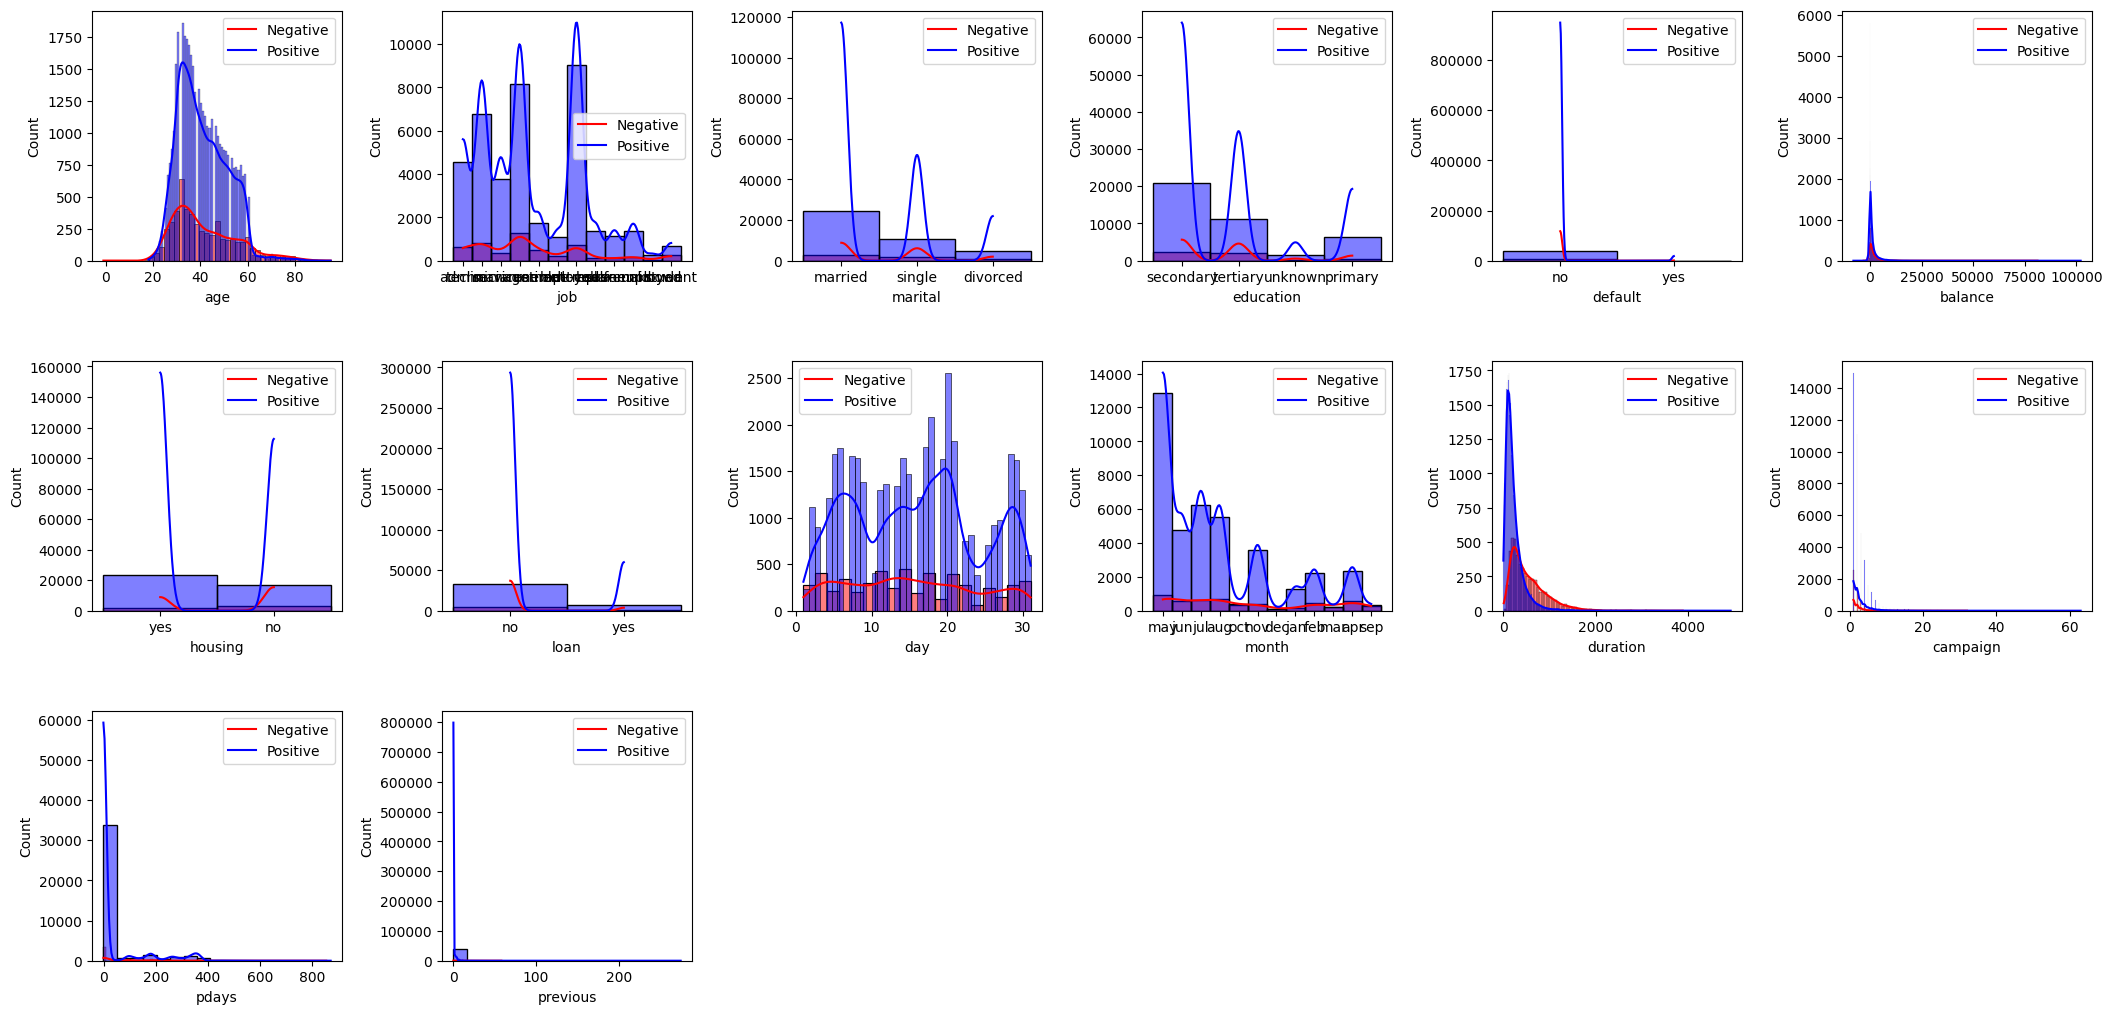

In [8]:
plt.figure(figsize=(25,25))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

df1 = df[df['y']==1].drop(['y'],axis=1)
df2 = df[df['y']==0].drop(['y'],axis=1)

cols = list(df1.columns)

for i, col in enumerate(cols):
    plt.subplot(6,6,i+1)
    sb.histplot(data=df1[col], color='red', label = 'Negative', kde=True)
    sb.histplot(data=df2[col], color='blue', label = 'Positive', kde=True)
    _,axes = plt.gca().get_legend_handles_labels()
    plt.legend(axes,prop={'size': 10})

plt.show()